In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.metrics import r2_score , mean_squared_error


In [24]:
data = {'MarketingSpend':[23,26,30,34,43,48],
       'Sales':[651,762,856,1063,1190,1298]}

In [25]:
data= pd.DataFrame(data)

<AxesSubplot:xlabel='MarketingSpend', ylabel='Sales'>

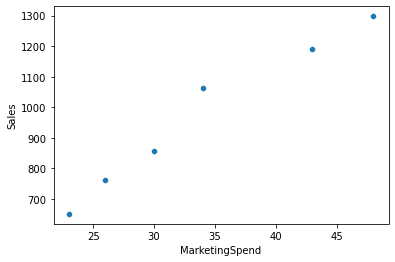

In [26]:
sns.scatterplot(data =data , x = 'MarketingSpend', y='Sales')

In [27]:
mm_scaler =MinMaxScaler()

In [28]:
data[['MarketingSpend' , 'Sales']]= mm_scaler.fit_transform(data[['MarketingSpend' , 'Sales']])

In [29]:
data

,MarketingSpend,Sales
0,0.00,0.000000
1,0.12,0.171561
2,0.28,0.316847
3,0.44,0.636785
4,0.80,0.833076
5,1.00,1.000000


In [30]:
X = data['MarketingSpend']
y = data['Sales']

In [31]:
X= X.values.reshape(-1,1)
y= y.values.reshape(-1,1)

In [32]:
lm =  LinearRegression()

In [33]:
lm.fit(X,y)

LinearRegression()

In [34]:
y_hat = lm.predict(X)

In [35]:
r2_sc = r2_score(y,y_hat)

In [36]:
rss = np.sum((y-y_hat)**2)

In [37]:
mse = rss/len(X) 

In [38]:
rmse = (mse)**0.5

In [39]:
rmse

0.06684348308019872

In [22]:
mse_ = mean_squared_error(y,y_hat)
mse_**0.5

0.06684348308019872

In [95]:
poly5 = PolynomialFeatures(5)
X_poly5= poly5.fit_transform(X)

In [96]:
poly3 = PolynomialFeatures(3)
X_poly3= poly3.fit_transform(X)
poly2 = PolynomialFeatures(2)
X_poly2= poly2.fit_transform(X)
poly4 = PolynomialFeatures(4)
X_poly4= poly4.fit_transform(X)
 

In [97]:
linreg_deg2= LinearRegression()
linreg_deg2.fit(X_poly2,y)
linreg_deg3= LinearRegression()
linreg_deg3.fit(X_poly3,y)
linreg_deg4= LinearRegression()
linreg_deg4.fit(X_poly4,y)
linreg_deg5= LinearRegression()
linreg_deg5.fit(X_poly5,y)


LinearRegression()

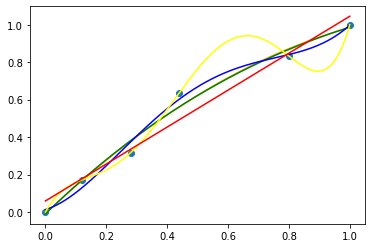

In [100]:
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)
plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,linreg_deg2.predict(poly2.fit_transform(X_seq)), color= 'orange')
plt.plot(X_seq,linreg_deg3.predict(poly3.fit_transform(X_seq)), color= 'green')
plt.plot(X_seq,linreg_deg4.predict(poly4.fit_transform(X_seq)), color= 'blue')
plt.plot(X_seq,linreg_deg5.predict(poly5.fit_transform(X_seq)), color= 'yellow')
plt.plot(X_seq , lm.predict(X_seq),color = 'red')


In [105]:
r2_score(linreg_deg4.predict(poly4.fit_transform(X)) , y)

0.9914853569646846

#### RIDGE REGRESSION

In [40]:
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)
lambdas = [0,0.001,0.01,0.1,1,10,100,1000]

C:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


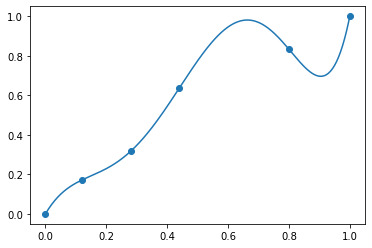

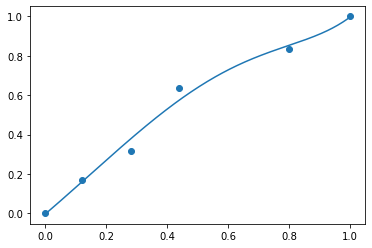

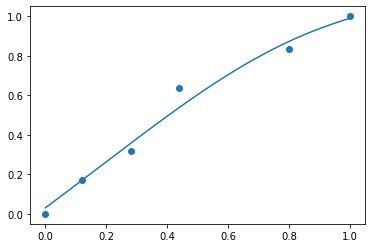

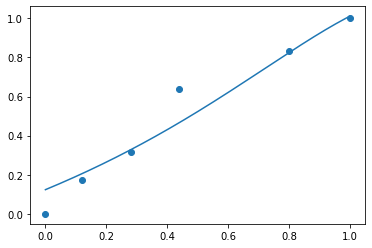

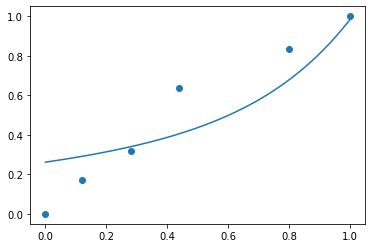

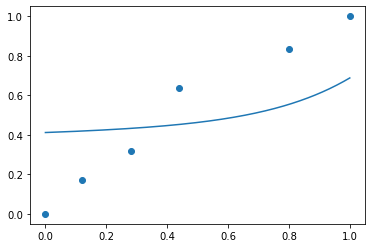

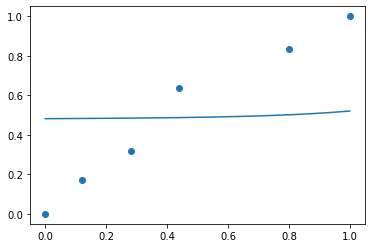

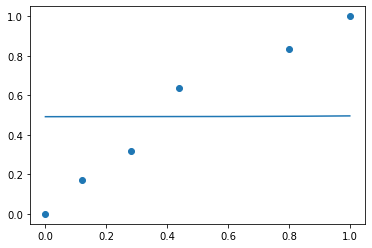

In [47]:
for i in lambdas:
    poly6 = PolynomialFeatures(6)
    X_poly6= poly6.fit_transform(X)
    
    ridgeReg = Ridge(alpha= i )
    ridgeReg.fit(X_poly6,y)
    plt.figure()
    
    plt.scatter(X,y)
    plt.plot(X_seq , ridgeReg.predict(poly6.fit_transform(X_seq)))
    

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Python\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003918051724197781, tolerance: 7.707765480436398e-05
  positive)


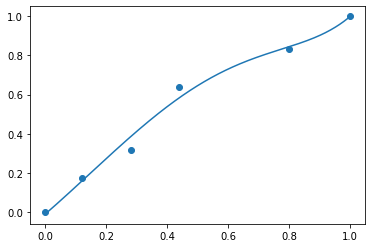

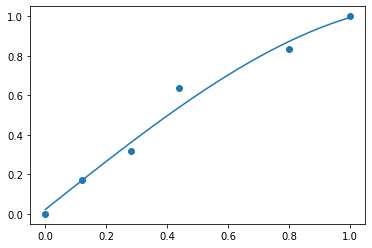

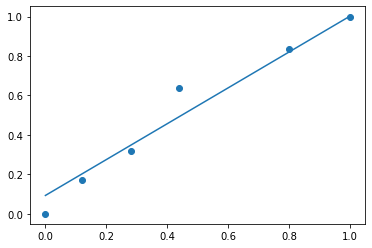

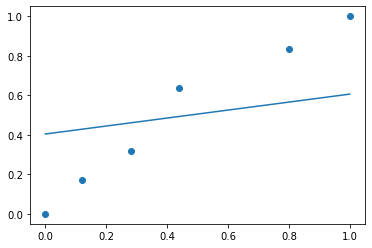

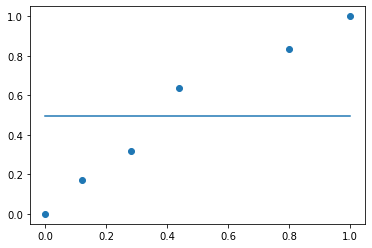

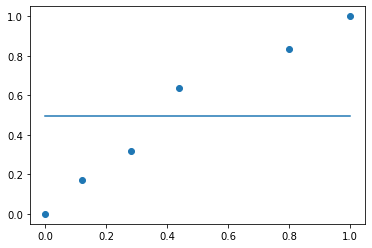

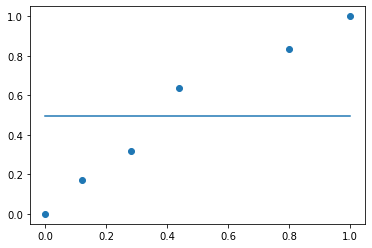

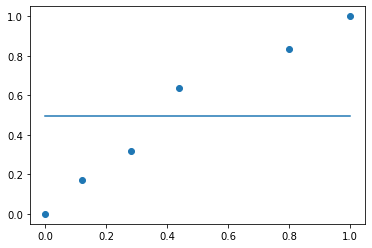

In [48]:
for i in lambdas:
    poly6 = PolynomialFeatures(6)
    X_poly6= poly6.fit_transform(X)
    
    lassoReg = Lasso(alpha= i )
    lassoReg.fit(X_poly6,y)
    plt.figure()

    plt.scatter(X,y)
    plt.plot(X_seq , lassoReg.predict(poly6.fit_transform(X_seq)))
    